In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covid_data = pd.read_csv("covid_19_india.csv")

In [3]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_data.shape

(18110, 9)

In [5]:
# Check for missing values in each column
covid_data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'], format='%Y-%m-%d')

In [7]:
covid_data = covid_data.sort_values(by="Date")

In [8]:
# Calculate Daily New Cases for India
india_cases = covid_data.groupby("Date")["Confirmed"].sum().reset_index()

In [9]:
# Compute daily new cases
india_cases['Daily_Cases'] = india_cases['Confirmed'].diff().fillna(0)

In [10]:
india_cases.head()

,Date,Confirmed,Daily_Cases
0,2020-01-30,1,0.0
1,2020-01-31,1,0.0
2,2020-02-01,2,1.0
3,2020-02-02,3,1.0
4,2020-02-03,3,0.0


In [11]:
# Highest Infection Spike 
highest_spike_day = india_cases.iloc[np.argmax(india_cases['Daily_Cases'])]['Date']

In [12]:
print("Day with Highest Infection Spike:", highest_spike_day)

Day with Highest Infection Spike: 2021-05-07 00:00:00


In [13]:
# Cumulative Sum of Infections 
india_cases['Cumulative_Cases'] = np.cumsum(india_cases['Daily_Cases'])

In [14]:
india_cases.head()

,Date,Confirmed,Daily_Cases,Cumulative_Cases
0,2020-01-30,1,0.0,0.0
1,2020-01-31,1,0.0,0.0
2,2020-02-01,2,1.0,1.0
3,2020-02-02,3,1.0,2.0
4,2020-02-03,3,0.0,2.0


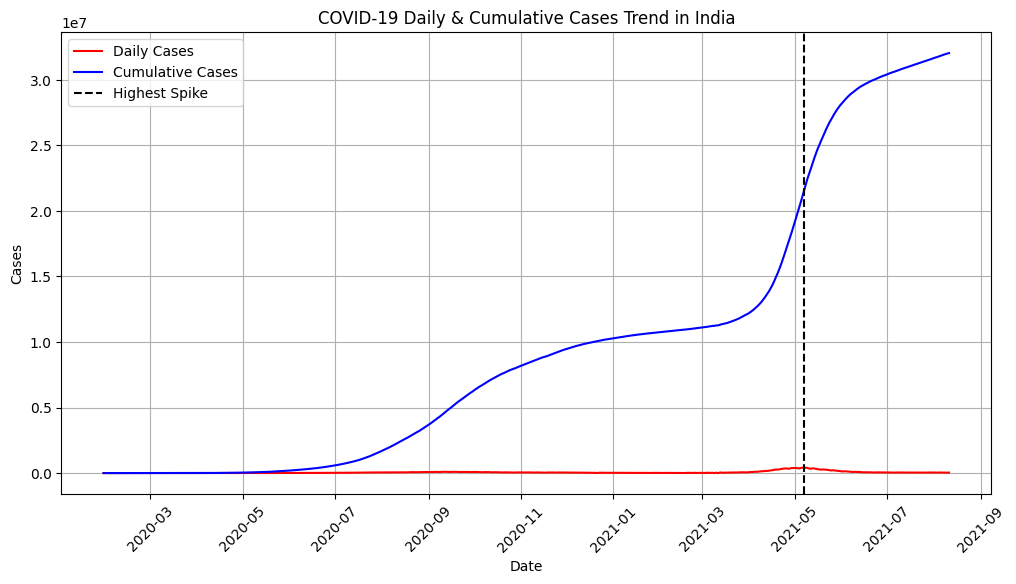

In [15]:
# Plot daily and cumulative cases
plt.figure(figsize=(12, 6))
plt.plot(india_cases['Date'], india_cases['Daily_Cases'], label="Daily Cases", color='red')
plt.plot(india_cases['Date'], india_cases['Cumulative_Cases'], label="Cumulative Cases", color='blue')
plt.axvline(highest_spike_day, color='black', linestyle='--', label="Highest Spike")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("COVID-19 Daily & Cumulative Cases Trend in India")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()
